In [1]:
%matplotlib notebook

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('us-counties.csv')

In [4]:
df['date'] = pd.to_datetime(df['date'])

In [5]:
df_ny = df[df['state'] == 'New York']

In [6]:
#df_ny['year'], df_ny['month'], df_ny['day'] = zip(*df_ny['date'].map(lambda x: (x.strftime('%Y'), x.strftime('%B'), x.strftime('%d'))))
df_ny['year-month'], df_ny['day'] = zip(*df_ny['date'].map(lambda x: (x.strftime('%Y-%B'), x.strftime('%d'))))

c:\users\wadekars\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [7]:
df_ny.head()

,date,county,state,fips,cases,deaths,year-month,day
416,2020-03-01,New York City,New York,NaN,1,0.0,2020-March,01
448,2020-03-02,New York City,New York,NaN,1,0.0,2020-March,02
482,2020-03-03,New York City,New York,NaN,2,0.0,2020-March,03
518,2020-03-04,New York City,New York,NaN,2,0.0,2020-March,04
519,2020-03-04,Westchester,New York,36119.0,9,0.0,2020-March,04


In [8]:
df_ny_counties = df_ny.groupby(['county', 'year-month']).agg({'cases':np.max})

In [9]:
df_ny_counties = df_ny.groupby(['county', 'year-month']).agg({'cases':np.max, 'deaths': np.max})

In [10]:
df_ny_counties.head()

cases  deaths
county year-month                  
Albany 2020-April      1165    53.0
       2020-August     2770   170.0
       2020-December  11585   202.0
       2020-July       2503   169.0
       2020-June       2102   159.0

In [11]:
df_ny_sum = df_ny_counties.groupby('year-month').agg({'cases':np.sum})

In [12]:
df_ny_sum = df_ny_counties.groupby('year-month').agg({'cases':np.sum, 'deaths':np.sum})

In [13]:
df_ny_sum.head()

,cases,deaths
year-month,,
2020-April,309696,24793.0
2020-August,439480,33325.0
2020-December,979040,37557.0
2020-July,419723,32372.0
2020-June,398142,31776.0


In [14]:
pd.to_datetime(df_ny_sum.index)

DatetimeIndex(['2020-04-01', '2020-08-01', '2020-12-01', '2020-07-01',
               '2020-06-01', '2020-03-01', '2020-05-01', '2020-11-01',
               '2020-10-01', '2020-09-01', '2021-04-01', '2021-02-01',
               '2021-01-01', '2021-03-01'],
              dtype='datetime64[ns]', name='year-month', freq=None)

In [15]:
df_ny_sum.index = pd.to_datetime(df_ny_sum.index)

In [16]:
df_ny_sum.sort_index(inplace=True)

In [17]:
df_ny_sum.index = df_ny_sum.index.strftime('%Y-%B')

In [18]:
df_ny_sum

,cases,deaths
year-month,,
2020-March,76216,1929.0
2020-April,309696,24793.0
2020-May,375575,29701.0
2020-June,398142,31776.0
2020-July,419723,32372.0
2020-August,439480,33325.0
2020-September,463369,32757.0
2020-October,512223,33156.0
2020-November,652748,34150.0


In [19]:
#df_ny_sum[df_ny_sum.index == pd.to_datetime(df_ny_sum.index).sort_values()]

In [20]:
df_ny_sum.head()

,cases,deaths
year-month,,
2020-March,76216,1929.0
2020-April,309696,24793.0
2020-May,375575,29701.0
2020-June,398142,31776.0
2020-July,419723,32372.0


In [21]:
#df_ny_sum.index = pd.to_datetime(df_ny_sum.index).sort_values()

<IPython.core.display.Javascript object>


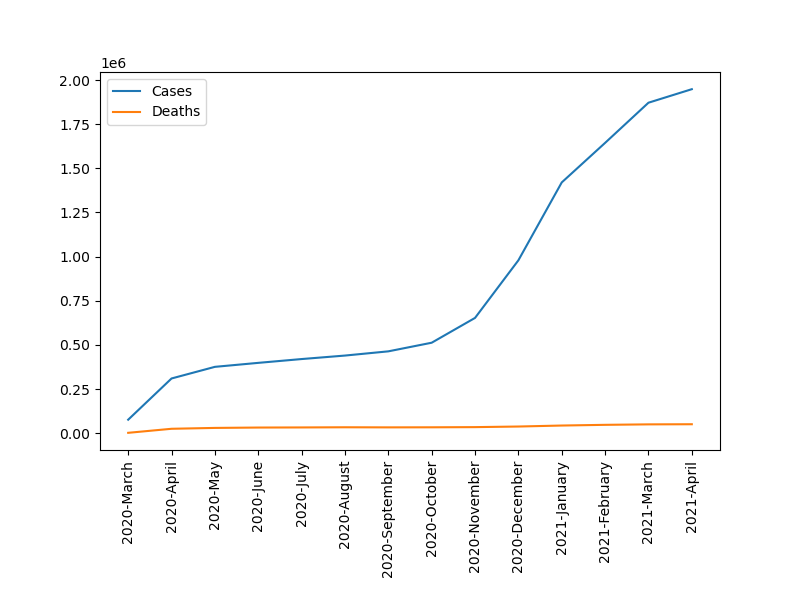

In [22]:
plt.figure(figsize=(8,6))
plt.plot(df_ny_sum.index, df_ny_sum['cases'], label='Cases')
plt.plot(df_ny_sum.index, df_ny_sum['deaths'], label='Deaths')
plt.xticks(rotation=90)
plt.subplots_adjust(bottom=0.25)
plt.legend(loc='best')

<IPython.core.display.Javascript object>


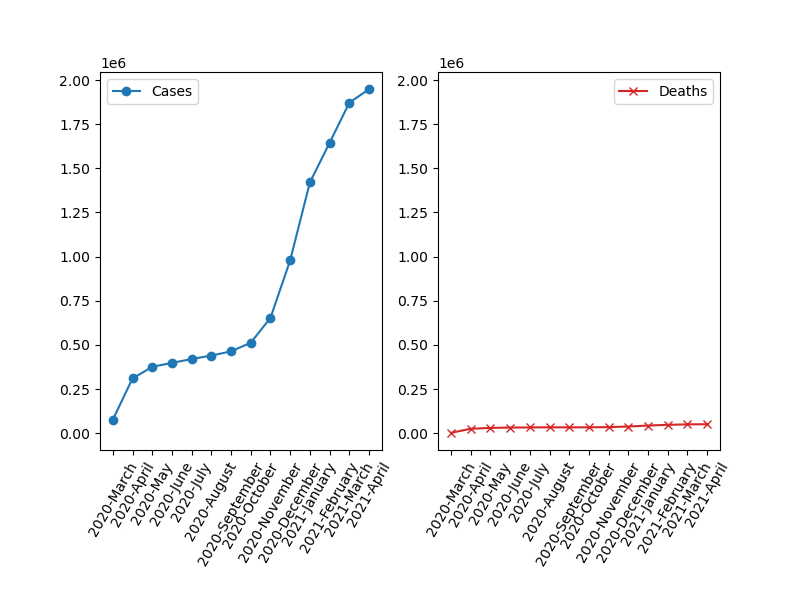

In [35]:
plt.figure(figsize=(8,6))
ax1 = plt.subplot(1,2,1)
plt.plot(df_ny_sum.index, df_ny_sum['cases'], '-o', color='#1F77B4', label='Cases')
plt.xticks(rotation=60)
plt.subplots_adjust(bottom=0.25)
plt.legend(loc='best')
ax2 = plt.subplot(1,2,2,sharey=ax1)
plt.plot(df_ny_sum.index, df_ny_sum['deaths'], '-x', color='#d62728', label='Deaths')
plt.xticks(rotation=60)
plt.subplots_adjust(bottom=0.25)
plt.legend(loc='best')

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(df_ny.groupby('county').agg({'cases':np.sum}).index, df_ny.groupby('county').agg({'cases':np.sum})['cases'])
plt.xticks(rotation=90)
plt.subplots_adjust(bottom=0.25)

In [ ]:
df_ny.groupby('county').agg({'cases':np.sum})